In [4]:
import sys,csv,re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Collection

In [5]:
#Using my credentials to establish a connection to Twitter.

from twython import Twython
from TwitterAPI import TwitterAPI
import twitter
import tweepy

consumerKey = 'TazkFOanvcxhW5UuSFBVhP0Xf'
consumerSecret = '6hhok418PM3llpID5fAZyae7bxEhW1hj3MNNXkcgAQs6SMu8ea'
accessToken = '1311452087830622208-X8FcC25wuE1JkdAPbbXASjXvMobHA2'
accessTokenSecret = 'JJXbg2G6KbfIZWhn77q0Pfye7TZiBZZCnyVkmN96MtwdF'

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)

api = tweepy.API(auth)

In [6]:
#This will be used to convert the tweepy results into a DataFrame.

def process_tweet(tweet):
    d = {}
    d['hashtags'] = "" # couldnt get working, but i dont need it
    d['tweet_id'] = tweet.id
    d['created_at'] = tweet.created_at
    d['text'] = tweet.text
    d['name'] = tweet.user.name
    d['user'] = tweet.user.screen_name
    d['user_id'] = tweet.user.id
    d['user_loc'] = tweet.user.location
    d['user_desc'] = tweet.user.description
    d['user_followers'] = tweet.user.followers_count
    d['user_friends'] = tweet.user.friends_count
    d['user_listed'] = tweet.user.listed_count
    d['user_created'] = tweet.user.created_at
    d['user_favs'] = tweet.user.favourites_count
    d['user_verified'] = tweet.user.verified
    d['user_statuses'] = tweet.user.statuses_count
    return d

In [7]:
#Creating the empty dataframes for  Coca Cola and Pepsi tweets

column_names = ['hashtags','tweet_id','created_at','text','name','user',
                'user_id','user_loc','user_desc','user_followers','user_friends',
                'user_listed','user_created','user_favs','user_verified','user_statuses']

cocacola_df = pd.DataFrame(columns = column_names)
pepsi_df = pd.DataFrame(columns = column_names)

In [8]:
SAMPLE_SIZE = 2500
FAVES_THRESHOLD = 0 # minimum number of likes for a tweet to be included in search results

In [9]:
pepsi_search_q = "to:pepsi min_faves:" + str(FAVES_THRESHOLD)

pepsi_tweets = api.search(q=pepsi_search_q, count=100, result_type="recent") # or "popular" or "mixed"

for result in pepsi_tweets:   
    row = process_tweet(result)
    
    num_tweets = pepsi_df.shape[0] # gets how many rows are in the dataframe
    pepsi_df.loc[num_tweets] = row # adds the tweet at the end of the dataframe
    
search_limit = 100
search_count = 1
last_max_id = pepsi_tweets.max_id # makes sure the next search does not include duplicate tweets

print("downloading tweets: .", end="")
while ((pepsi_df.shape[0] < SAMPLE_SIZE) and search_count < search_limit):
    pepsi_tweets = api.search(q=pepsi_search_q, count=100, result_type="recent", max_id=last_max_id)
    search_count += 1
    last_max_id = pepsi_tweets.max_id # makes sure the next search does not include duplicate tweets
    print(".", end="") # printing a loading bar to make sure download isn't frozen
    
    for result in pepsi_tweets:
        row = process_tweet(result)
        
        num_tweets = pepsi_df.shape[0] # gets how many rows are in the dataframe
        pepsi_df.loc[num_tweets] = row # adds the tweet at the end of the dataframe
        
print(" completed!")

downloading tweets: ........................... completed!


In [10]:
cocacola_search_q = "to:cocacola min_faves:" + str(FAVES_THRESHOLD)

cocacola_tweets = api.search(q=cocacola_search_q, count=100, result_type="recent") # or "popular" or "mixed"

for result in cocacola_tweets:   
    row = process_tweet(result)
    
    num_tweets = cocacola_df.shape[0] # gets how many rows are in the dataframe
    cocacola_df.loc[num_tweets] = row # adds the tweet at the end of the dataframe
    
search_limit = 100
search_count = 1
last_max_id = cocacola_tweets.max_id # makes sure the next search does not include duplicate tweets

print("downloading tweets: .", end="")
while ((cocacola_df.shape[0] < SAMPLE_SIZE) and search_count < search_limit):
    
    cocacola_tweets = api.search(q=cocacola_search_q, count=100, result_type="recent", max_id=last_max_id)
    search_count += 1
    last_max_id = cocacola_tweets.max_id # makes sure the next search does not include duplicate tweets
    print(".", end="") # printing a loading bar to make sure program isn't frozen
    
    for result in cocacola_tweets:
        row = process_tweet(result)
        
        num_tweets = cocacola_df.shape[0] # gets how many rows are in the dataframe
        cocacola_df.loc[num_tweets] = row # adds the tweet at the end of the dataframe

print(" completed")

downloading tweets: ........................... completed


A peek inside the Dataframe

In [11]:
cocacola_df.head(5)

,hashtags,tweet_id,created_at,text,name,user,user_id,user_loc,user_desc,user_followers,user_friends,user_listed,user_created,user_favs,user_verified,user_statuses
0,,1330003983440748544,2020-11-21 04:23:54,@CocaCola @Conscious_kosh 🥂,Bannet🌻,bannet01,1223217644926652417,Puerto Rico,el matador 📍,6477,4598,2,2020-01-31 12:14:10,29926,False,12595
1,,1329998675314176000,2020-11-21 04:02:49,@CocaCola @Mykol22 and @Scillah4,E L W Y N🦌🇺🇬,elwin_lian,4425325697,Uganda,Youngest C.E.O ¦ Content analyst ¦ Youth Award...,7301,6616,0,2015-12-09 09:48:10,51198,False,4626
2,,1329998516094193667,2020-11-21 04:02:11,@CocaCola @ProjectLincoln @ReverendWarnock @os...,MC,MC77313208,1173427214341279745,,,0,3,0,2019-09-16 02:43:54,88,False,71
3,,1329996981352206341,2020-11-21 03:56:05,@CocaCola Can it be a Fresca? #sohappyfrescai...,MaryBeth Downes,downesmb,271663604,,,46,82,0,2011-03-24 23:32:42,9346,False,104
4,,1329996442166046720,2020-11-21 03:53:56,@CocaCola howdy,Flarenics,Flarenics,1139248647902814208,your mothers house,unless your garfield than fuck you. No excepti...,2,55,0,2019-06-13 19:10:18,373,False,23


# Dropping Unecessary Columns

In [12]:
# removing these unused columns
pepsi_df.drop('hashtags', axis=1, inplace=True) #this actually changes Pepsi DF instead of me having to create a new one
pepsi_df.drop('tweet_id', axis=1, inplace=True)
pepsi_df.drop('created_at', axis=1, inplace=True)
pepsi_df.drop('user_id', axis=1, inplace=True)
pepsi_df.drop('user_followers', axis=1, inplace=True)
pepsi_df.drop('user_friends', axis=1, inplace=True)
pepsi_df.drop('user_listed', axis=1, inplace=True)
pepsi_df.drop('user_created', axis=1, inplace=True)
pepsi_df.drop('user_favs', axis=1, inplace=True)
pepsi_df.drop('user_statuses', axis=1, inplace=True)

cocacola_df.drop('hashtags', axis=1, inplace=True)
cocacola_df.drop('tweet_id', axis=1, inplace=True)
cocacola_df.drop('created_at', axis=1, inplace=True)
cocacola_df.drop('user_id', axis=1, inplace=True)
cocacola_df.drop('user_followers', axis=1, inplace=True)
cocacola_df.drop('user_friends', axis=1, inplace=True)
cocacola_df.drop('user_listed', axis=1, inplace=True)
cocacola_df.drop('user_created', axis=1, inplace=True)
cocacola_df.drop('user_favs', axis=1, inplace=True)
cocacola_df.drop('user_statuses', axis=1, inplace=True)

# Gender Analysis

In [13]:
import gender_guesser.detector as gender
detector = gender.Detector(case_sensitive=False)

In [14]:
def determine_gender(user_name, user, user_desc, user_loc, user_verified):
    
    # remove emoji from their display name - didn't get to this part
    
    # analyze the gender using just the display name
    name = user_name.replace("_",' ')
    name = name.replace('-',' ')
    name = name.replace('~',' ')
    first_name = name.split()[0]
    gender = detector.get_gender(first_name)
    
    # try to detect gender from the twitter handle(their @ name)
    if (gender == "unknown"):
        name = user.replace('-',' ')
        name = name.replace("_"," ")
        first_name = name.split(' ')[0]
        gender = detector.get_gender(first_name)
        
    # if gender is still inconclusive, scan user's bio or location for pronouns
    if (gender == "unknown"):
        pass
    
    # removing gender-guesser's intermediate categories for simplicity
    if (gender == "mostly_male"):
        return("male")
    elif (gender == "mostly_female"):
        return("female")
    else:
        return(gender)
    

In [15]:
cocacola_df['gender'] = cocacola_df.apply(lambda row: determine_gender(row['name'], row['user'], row['user_desc'], row['user_loc'], row['user_verified']), axis=1)
pepsi_df['gender'] = pepsi_df.apply(lambda row: determine_gender(row['name'], row['user'], row['user_desc'], row['user_loc'], row['user_verified']), axis=1)

Here is the Dataframe with the new 'gender' column:

In [16]:
pepsi_df.head(5)

,text,name,user,user_loc,user_desc,user_verified,gender
0,@pepsi PUT MARIAH CAREY’S RINGTONE ALBUM ON AP...,𝐸𝐿𝐼,eliahbailey,,Mariah | Rihanna | Taylor | Beyoncé | Britney,False,unknown
1,@pepsi sup,Flarenics,Flarenics,your mothers house,unless your garfield than fuck you. No excepti...,False,unknown
2,@pepsi #PepsiApplePieChallenge\nThis is what h...,Handicapped_GT,GtHandicapped,,Just a guy who loves racing.,False,unknown
3,@pepsi @Hot_Wheels Ratio,wiisperss | Pepsi Stan™️,2_wiisperss,,while I’m suspended,False,unknown
4,@pepsi So you wanna play Fortnite or something?,wiisperss | Pepsi Stan™️,2_wiisperss,,while I’m suspended,False,unknown


# Sentiment Analysis

In [17]:
from textblob import TextBlob

def calculate_polarity(tweet_text):
    text_analysis = TextBlob(tweet_text)
    return text_analysis.sentiment.polarity

def calculate_subjectivity(tweet_text):
    text_analysis = TextBlob(tweet_text)
    return text_analysis.sentiment.subjectivity

In [18]:
cocacola_df['polarity'] = cocacola_df.apply(lambda row: calculate_polarity(row['text']), axis=1)
cocacola_df['subjectivity'] = cocacola_df.apply(lambda row: calculate_subjectivity(row['text']), axis=1)

pepsi_df['polarity'] = pepsi_df.apply(lambda row: calculate_polarity(row['text']), axis=1)
pepsi_df['subjectivity'] = pepsi_df.apply(lambda row: calculate_subjectivity(row['text']), axis=1)

Here is what the final format of the Dataframes looks like:

In [19]:
cocacola_df[cocacola_df.gender != "unknown"].head(10)

,text,name,user,user_loc,user_desc,user_verified,gender,polarity,subjectivity
1,@CocaCola @Mykol22 and @Scillah4,E L W Y N🦌🇺🇬,elwin_lian,Uganda,Youngest C.E.O ¦ Content analyst ¦ Youth Award...,False,male,0.0,0.00
3,@CocaCola Can it be a Fresca? #sohappyfrescai...,MaryBeth Downes,downesmb,,,False,female,0.0,0.00
5,@CocaCola @letters256 \n@NagujjaShaluwah \n@Sa...,Nabil.. 😝😌😈,nabil_nsubuga__,Uganda,🎀😍😍😎\nI love you means that I accept you for t...,False,male,0.0,0.00
7,RT @AURELIO_XCV: @CocaCola pay this girl,Cass With A Camera📸🌼,_cassheen,,just a girl with a camera + your local gardener,False,female,0.0,0.00
9,@CocaCola https://t.co/TG5RngOklX,Tim Byrne,therealTimByrne,Roxbury High School 20,you may have heard my name in that pitbull song,False,male,0.0,0.00
10,@CocaCola pay this girl https://t.co/OelyhMYIE6,𝐁𝐋𝐌/𝐀𝐮𝐫𝐞𝐥𝐢𝐨_𝐗𝐂𝐕,AURELIO_XCV,Furthur,adopt the pace of nature; her secret is patien...,False,male,0.0,0.00
11,@CocaCola more like cock a cola lolz,Jack,quaggg_,,me when,False,male,0.5,0.50
12,@CocaCola how can I safely share the magic wit...,Tim Byrne,therealTimByrne,Roxbury High School 20,you may have heard my name in that pitbull song,False,male,0.5,0.75
13,@CocaCola is Winter Cranberry #Sprite availabl...,David Pearce,djpearce79,"New York, NY",,False,male,0.2,0.70
14,@CocaCola hey coca cola my youth group is hav...,alyssa 🌻,alyssa_martinz,,cfhs 21’ | god has more ✞,False,female,0.2,0.20


# Visualizations of the Data

In [20]:
narrow_bins = [-1, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 
               0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
wide_bins = [-1, -0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0]

def create_sentiment_plot(dataframe, plot_title, pepsi):
    plot_df = dataframe[['polarity']]
    
    fig, ax = plt.subplots(figsize=(7,4))
    
    if(pepsi):
        brand_color = "blue"
    else:
        brand_color = "red"
    
    plot_df.hist(bins=narrow_bins, ax=ax, color=brand_color)
    
    plt.title(plot_title)
    plt.show()
    # old way of drawing histograms, function below makes triple plot of histogram, histogram, box plot 
    # so ignore this
    
def create_sentiment_plots(cocacola_data, cocacola_bins, pepsi_data, pepsi_bins, plot_title):
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14,4))
    
    # plotting coca cola data on the left
    cocacola_df = cocacola_data[['polarity']]
    cocacola_df.hist(bins=cocacola_bins, ax=axes[0], color="red")
    
    # labelling coca cola plot
    cocacola_plot = axes[0]
    cocacola_plot.set_title(plot_title + " towards Coca-Cola")
    cocacola_plot.set_xlim([-1.0, 1.0])
    cocacola_plot.set_xlabel('Sentiment')
    cocacola_plot.set_ylabel('Number of Tweets')

    
    # plotting pepsi data on the right
    pepsi_df = pepsi_data[['polarity']]
    pepsi_df.hist(bins=pepsi_bins, ax=axes[1], color="blue")
    
    # labelling pepsi plot
    pepsi_plot = axes[1]
    pepsi_plot.set_title(plot_title + " towards Pepsi")
    pepsi_plot.set_xlim([-1.0, 1.0])
    pepsi_plot.set_xlabel('Sentiment')
    
    
    # box-and-whisker-plot
    cocacola_df = cocacola_data['polarity']
    pepsi_df = pepsi_data['polarity']
    axes[2].boxplot([pepsi_df, cocacola_df], True, 'rs', False, labels=["Pepsi", "Coca-Cola"])
    axes[2].set_title("Sentiment Distribution")
        
    
    plt.tight_layout()
    plt.show()
    
# this filters out neutral (0.0) sentiments
def filter_neutral(dataframe):
    return dataframe[(dataframe.polarity != 0.0)]


# Histogram Plots: Sentiment by Gender for Coke and Pepsi

In [21]:
cocacola_female = cocacola_df[cocacola_df.gender == "female"]
pepsi_female    = pepsi_df[pepsi_df.gender == "female"]

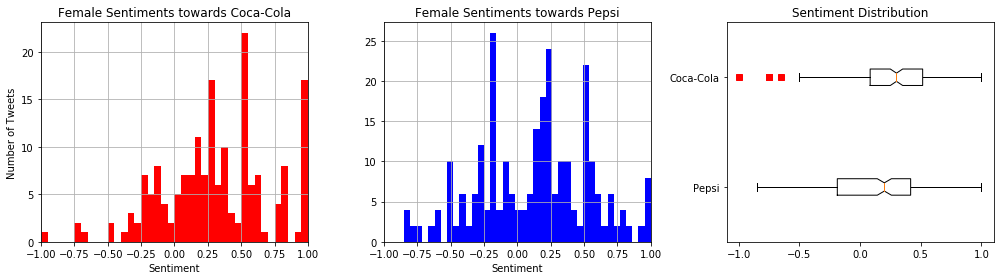

In [22]:
create_sentiment_plots(filter_neutral(cocacola_female), 40,
                       filter_neutral(pepsi_female),    40,
                       "Female Sentiments")

In [23]:
cocacola_male = cocacola_df[cocacola_df.gender == "male"]
pepsi_male    = pepsi_df[pepsi_df.gender == "male"]

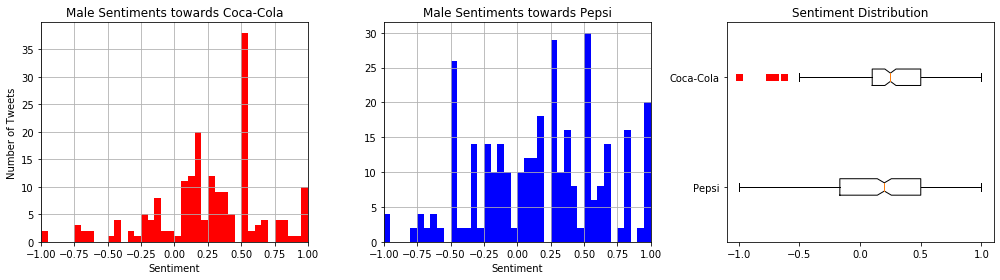

In [24]:
create_sentiment_plots(filter_neutral(cocacola_male), 40,
                       filter_neutral(pepsi_male),    40,
                       "Male Sentiments")

In [25]:
cocacola_unknown = cocacola_df[cocacola_df.gender == "unknown"]
pepsi_unknown    = pepsi_df[pepsi_df.gender == "unknown"]

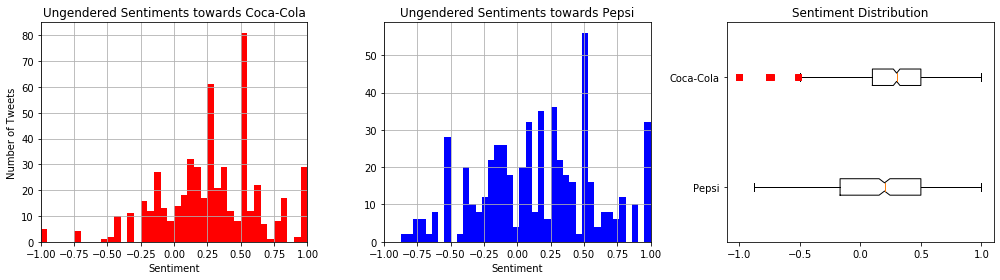

In [26]:
create_sentiment_plots(filter_neutral(cocacola_unknown), 40,
                       filter_neutral(pepsi_unknown),    40,
                       "Ungendered Sentiments")